In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
!kaggle datasets download -d saurabhbadole/breast-cancer-wisconsin-state

Dataset URL: https://www.kaggle.com/datasets/saurabhbadole/breast-cancer-wisconsin-state
License(s): other
breast-cancer-wisconsin-state.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/breast-cancer-wisconsin-state.zip

Archive:  /content/breast-cancer-wisconsin-state.zip
  inflating: breast-cancer-wisconsin.data  


In [ ]:
df = pd.read_csv('/content/breast-cancer-wisconsin.data', delimiter=',', header=None)

df.to_csv('/content/breast-cancer-wisconsin.csv', index=False)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
1,1002945,5,4,4.0,5.0,7,10,3,2.0,1.0,2.0
2,1015425,3,1,1.0,1.0,2,2,3,1.0,1.0,2.0
3,1016277,6,8,8.0,1.0,3,4,3,7.0,1.0,2.0
4,1017023,4,1,1.0,3.0,2,1,3,1.0,1.0,2.0


In [ ]:
df.columns = ["Sample Code Number","Clump Thickness","Unifomity of Cell Size", "Uniformity of Cell Shape",
              "Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"]

In [ ]:
df.head()

,Sample Code Number,Clump Thickness,Unifomity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
1,1002945,5,4,4.0,5.0,7,10,3,2.0,1.0,2.0
2,1015425,3,1,1.0,1.0,2,2,3,1.0,1.0,2.0
3,1016277,6,8,8.0,1.0,3,4,3,7.0,1.0,2.0
4,1017023,4,1,1.0,3.0,2,1,3,1.0,1.0,2.0


In [ ]:
df.shape

(699, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample Code Number           699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Unifomity of Cell Size       699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    float64
 4   Marginal Adhesion            699 non-null    float64
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  699 non-null    object 
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    float64
 9   Mitoses                      699 non-null    float64
 10  Class                        699 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 60.2+ KB


In [ ]:
df.describe().style.format("{:.1f}")

,Sample Code Number,Clump Thickness,Unifomity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.0,699.0,699.0,699.0,699.0,699.0,699.0,699.0,699.0,699.0
mean,1071704.1,4.4,3.1,3.2,2.8,3.2,3.4,2.9,1.6,2.7
std,617095.7,2.8,3.1,3.0,2.9,2.2,2.4,3.1,1.7,1.0
min,61634.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
25%,870688.5,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0
50%,1171710.0,4.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,2.0
75%,1238298.0,6.0,5.0,5.0,4.0,4.0,5.0,4.0,1.0,4.0
max,13454352.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0


In [ ]:
num_cols = df.describe().style.format("{:.1f}").columns

In [ ]:
df.isna().sum()

,0
Sample Code Number,0
Clump Thickness,0
Unifomity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0


In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['Bare Nuclei'].value_counts()

,count
Bare Nuclei,
1,396
10,130
2,30
5,30
3,28
8,20
4,19
?,16
9,9


In [ ]:
for col in df.columns:
  print(df[col].value_counts())
  print('==============================')

Sample Code Number
1182404    6
1276091    5
897471     2
1168736    2
1114570    2
          ..
1231387    1
1231706    1
1232225    1
1236043    1
814265     1
Name: count, Length: 645, dtype: int64
Clump Thickness
1     142
5     129
3     106
4      80
10     69
2      50
8      46
6      33
7      23
9      13
Name: count, dtype: int64
Unifomity of Cell Size
1     379
10     65
3      51
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity of Cell Shape
1.0     347
2.0      59
10.0     56
3.0      56
4.0      44
5.0      33
6.0      30
7.0      30
8.0      28
9.0       7
1.1       1
Name: count, dtype: int64
Marginal Adhesion
1.0     400
3.0      58
2.0      56
10.0     55
4.0      33
8.0      25
5.0      23
6.0      22
7.0      13
9.0       5
1.2       1
Name: count, dtype: int64
Single Epithelial Cell Size
2     383
3      71
4      48
1      45
6      41
5      39
10     30
8      20
7      12
9       2
Name: count, dtype: i

In [ ]:
df['Bare Nuclei'] = df['Bare Nuclei'].replace({'?' :np.nan})

In [ ]:
df['Bare Nuclei']= df['Bare Nuclei'].fillna(df['Bare Nuclei'].mean)

In [ ]:
#df = df.dropna(subset=['Bare Nuclei'])

In [ ]:
# df['Bare Nuclei'] = df['Bare Nuclei'].astype('float')
# df['Class'] = df['Class'].astype('int')

In [ ]:
# Replace non-numeric values with NaN
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')

df['Bare Nuclei'].fillna(df['Bare Nuclei'].median(), inplace=True)
df['Bare Nuclei'] = df['Bare Nuclei'].astype('float')


In [ ]:
df['Class'] = df['Class'].astype('int')

In [ ]:
df.head()

,Sample Code Number,Clump Thickness,Unifomity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
1,1002945,5,4,4.0,5.0,7,10.0,3,2.0,1.0,2.0
2,1015425,3,1,1.0,1.0,2,2.0,3,1.0,1.0,2.0
3,1016277,6,8,8.0,1.0,3,4.0,3,7.0,1.0,2.0
4,1017023,4,1,1.0,3.0,2,1.0,3,1.0,1.0,2.0


In [ ]:
df = df.drop(columns='Sample Code Number')

In [ ]:
df.isna().sum()

,0
Clump Thickness,0
Unifomity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0
Class,0


<Axes: >

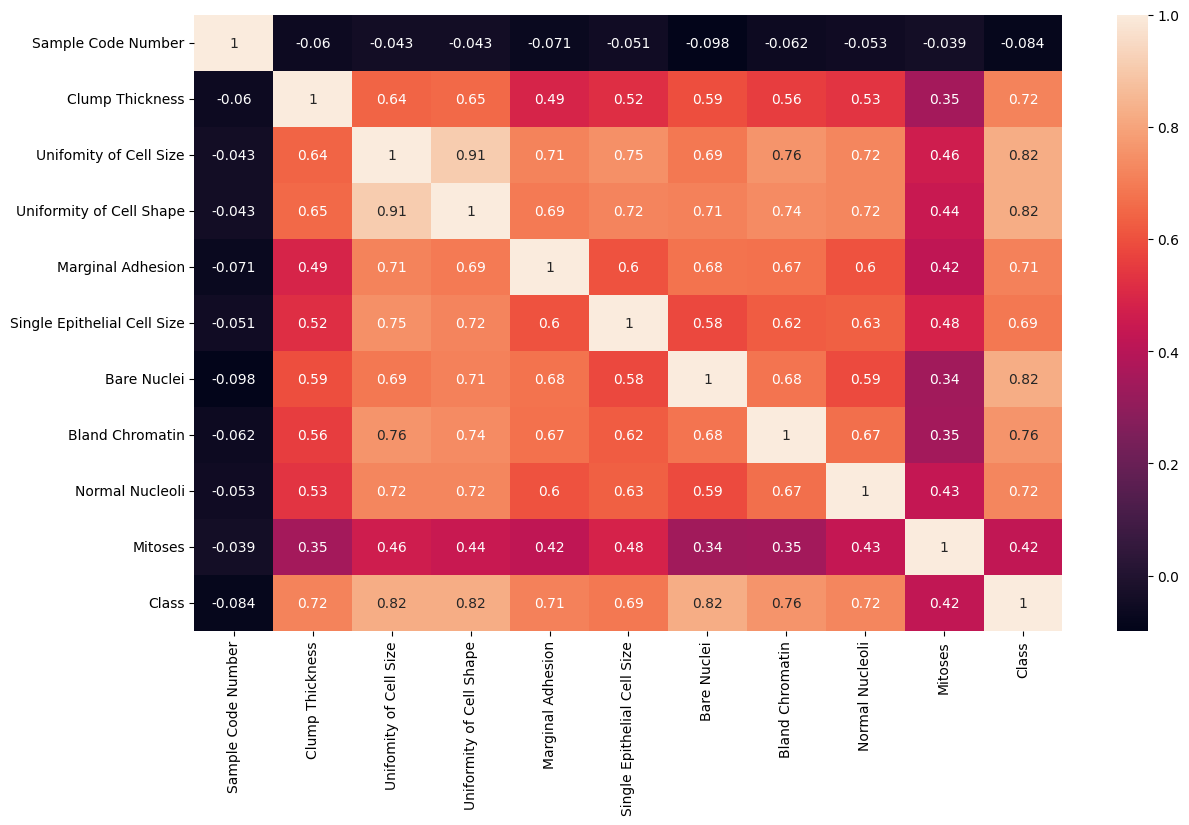

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)


In [ ]:
df.head()

,Sample Code Number,Clump Thickness,Unifomity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2
1,1002945,5,4,4.0,5.0,7,10.0,3,2.0,1.0,2
2,1015425,3,1,1.0,1.0,2,2.0,3,1.0,1.0,2
3,1016277,6,8,8.0,1.0,3,4.0,3,7.0,1.0,2
4,1017023,4,1,1.0,3.0,2,1.0,3,1.0,1.0,2


In [ ]:
df['Class'].value_counts()

,count
Class,
2,439
4,236


In [ ]:
X = df.drop(columns=['Class' , 'Uniformity of Cell Shape'])
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Lr = LogisticRegression()

In [ ]:
Lr.fit(X_train , y_train)

LogisticRegression()

In [ ]:
Lr.score(X_train , y_train)

0.9728260869565217

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel ='rbf',class_weight='balanced')

In [ ]:
model.fit(X_train , y_train)

SVC(class_weight='balanced')

In [ ]:
model.score(X_train , y_train)

0.9764492753623188

In [ ]:
model.score(X_test, y_test)

0.9640287769784173

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.97      0.97        98
           4       0.93      0.95      0.94        41

    accuracy                           0.96       139
   macro avg       0.95      0.96      0.96       139
weighted avg       0.96      0.96      0.96       139

